In [1]:
f = open("data/users/users.json", "r")
text = f.read()
text

'[\n  {\n    "id": 0,\n    "firstName": "andrey",\n    "lastName": "pisarev",\n    "age": 20,\n    "weight": 92,\n    "height": 181,\n    "gender": "Male"\n  },\n  {\n    "id": 1,\n    "firstName": "stas",\n    "lastName": "stepanov",\n    "age": 24,\n    "weight": 92,\n    "height": 190,\n    "gender": "Male"\n  },\n  {\n    "id": 2,\n    "firstName": "a",\n    "lastName": "a",\n    "age": 18,\n    "weight": 72,\n    "height": 185,\n    "gender": "Male"\n  },\n  {\n    "id": 3,\n    "firstName": "b",\n    "lastName": "b",\n    "age": 18,\n    "weight": 65,\n    "height": 177,\n    "gender": "Male"\n  },\n  {\n    "id": 4,\n    "firstName": "c",\n    "lastName": "c",\n    "age": 17,\n    "weight": 100,\n    "height": 193,\n    "gender": "Male"\n  },\n  {\n    "id": 5,\n    "firstName": "d",\n    "lastName": "d",\n    "age": 18,\n    "weight": 48,\n    "height": 165,\n    "gender": "Female"\n  },\n  {\n    "id": 6,\n    "firstName": "e",\n    "lastName": "e",\n    "age": 18,\n    "weigh

In [2]:
import json
import pandas as pd

data_done = []

data = json.loads(text)
for item in data:
    data_done.append(pd.json_normalize(item))

pd_users = pd.concat(data_done)
pd_users

,id,firstName,lastName,age,weight,height,gender
0,0,andrey,pisarev,20,92,181,Male
0,1,stas,stepanov,24,92,190,Male
0,2,a,a,18,72,185,Male
0,3,b,b,18,65,177,Male
0,4,c,c,17,100,193,Male
0,5,d,d,18,48,165,Female
0,6,e,e,18,0,175,Female
0,7,k,k,18,64,184,Male
0,8,m,m,18,72,178,Male
0,9,n,n,18,69,175,Male


In [3]:
pd_users.describe()

,id,age,weight,height
count,19.000000,19.000000,19.000000,19.000000
mean,9.000000,18.684211,67.631579,179.000000
std,5.627314,1.492672,21.530884,8.041559
min,0.000000,17.000000,0.000000,164.000000
25%,4.500000,18.000000,60.000000,175.000000
50%,9.000000,18.000000,67.000000,178.000000
75%,13.500000,19.000000,75.000000,185.000000
max,18.000000,24.000000,100.000000,193.000000


In [4]:
import os
import glob

json_pattern = os.path.join("data/new", '*.json')
file_list = glob.glob(json_pattern)
tmp_data = []
for file in file_list:
    b = file.rpartition("/")[-1]
    c = b.split("_")
    tmp_data.append({ "userId": c[0], "exId": c[1]})

df = pd.DataFrame.from_dict(tmp_data)
df

,userId,exId
0,15,2
1,7,5
2,0,2
3,8,5
4,7,4
...,...,...
76,14,5
77,17,5
78,9,4
79,11,2


In [5]:
import matplotlib.pyplot as plt

In [6]:
a = "data/new/10_3_2023-04-25T10_05_00.925811Z.json"
b = a.rpartition("/")[-1]
c = b.split("_")
c

['10', '3', '2023-04-25T10', '05', '00.925811Z.json']

In [7]:
df

,userId,exId
0,15,2
1,7,5
2,0,2
3,8,5
4,7,4
...,...,...
76,14,5
77,17,5
78,9,4
79,11,2


In [8]:
a = pd_users.groupby(['gender'])
a

In [9]:
counted = a.count()
counted

,id,firstName,lastName,age,weight,height
gender,,,,,,
Female,4,4,4,4,4,4
Male,15,15,15,15,15,15


([<matplotlib.patches.Wedge at 0x7ff490504160>,
 [Text(0.8680545570066952, 0.675633988236168, 'Женщины: 4'),
  Text(-0.8680544937492721, -0.675634069509298, 'Мужчины: 15')])

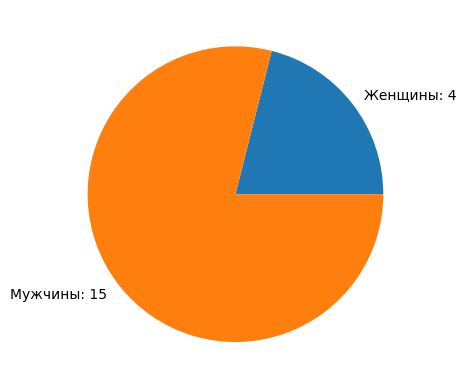

In [10]:
plt.pie(counted.id, labels=['Женщины: ' + str(counted.id[0]), 'Мужчины: ' + str(counted.id[1])])

In [11]:
df
grouped_df = df.groupby('exId').count()
grouped_df

,userId
exId,
1,18
2,13
3,17
4,17
5,16


([<matplotlib.patches.Wedge at 0x7ff4705c82b0>,
 [Text(0.8426488837530798, 0.7070663750382201, 'Приседания: 22.0'),
  Text(-0.3561073266401273, 1.040762975856281, 'Отжимания: 16.0'),
  Text(-1.096692231244855, 0.08524171471281844, ' Прыжки: 21.0'),
  Text(-0.3561074240833884, -1.0407629425151022, 'Выпады: 21.0'),
  Text(0.8949072144443122, -0.6396413663417354, ' Пресс: 20.0')])

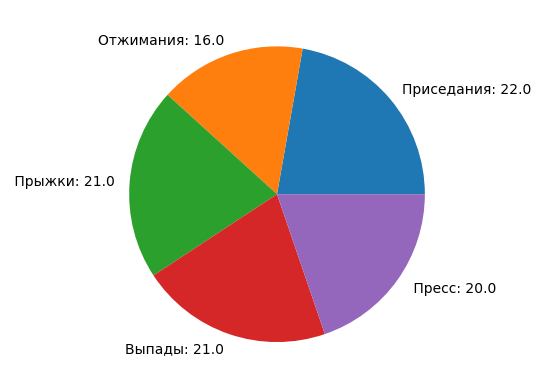

In [12]:
plt.pie(grouped_df.userId, labels=['Приседания: ' + str(round(grouped_df.userId[0] / 81, 2) * 100), 'Отжимания: ' + str(round(grouped_df.userId[1] / 81, 2) * 100), ' Прыжки: ' + str(round(grouped_df.userId[2] / 81, 2) * 100), 'Выпады: ' + str(round(grouped_df.userId[3] / 81, 2) * 100), ' Пресс: ' + str(round(grouped_df.userId[4] / 81, 2) * 100)])